In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [4]:
#chechk for null values
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
#drop null values
df.dropna(inplace=True)

In [6]:
df.shape

(702, 9)

In [7]:
#independant featurd
x=df.iloc[:,:-1]

#Independant features
y=df.iloc[:,-1]

# Test train split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# ANN

In [9]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [63]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 150)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               1152      
                                                                 
 dense_61 (Dense)            (None, 256)               33024     
                                                                 
 dense_62 (Dense)            (None, 256)               65792     
                                                                 
 dense_63 (Dense)            (None, 256)               65792     
                                                                 
 dense_64 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
33/33 [============================

33/33 [==============================] - 0s 4ms/step - loss: 47.5660 - mean_absolute_error: 47.5660 - val_loss: 47.3972 - val_mean_absolute_error: 47.3972
Epoch 44/150
33/33 [==============================] - 0s 3ms/step - loss: 47.5440 - mean_absolute_error: 47.5440 - val_loss: 50.4378 - val_mean_absolute_error: 50.4378
Epoch 45/150
33/33 [==============================] - 0s 3ms/step - loss: 51.3337 - mean_absolute_error: 51.3337 - val_loss: 57.5076 - val_mean_absolute_error: 57.5076
Epoch 46/150
33/33 [==============================] - 0s 3ms/step - loss: 50.0943 - mean_absolute_error: 50.0943 - val_loss: 47.0429 - val_mean_absolute_error: 47.0429
Epoch 47/150
33/33 [==============================] - 0s 3ms/step - loss: 50.8063 - mean_absolute_error: 50.8063 - val_loss: 48.7738 - val_mean_absolute_error: 48.7738
Epoch 48/150
33/33 [==============================] - 0s 3ms/step - loss: 47.3555 - mean_absolute_error: 47.3555 - val_loss: 50.0221 - val_mean_absolute_error: 50.0221
Epoch

Epoch 92/150
33/33 [==============================] - 0s 5ms/step - loss: 47.4912 - mean_absolute_error: 47.4912 - val_loss: 51.8960 - val_mean_absolute_error: 51.8960
Epoch 93/150
33/33 [==============================] - 0s 3ms/step - loss: 45.1096 - mean_absolute_error: 45.1096 - val_loss: 50.3039 - val_mean_absolute_error: 50.3039
Epoch 94/150
33/33 [==============================] - 0s 3ms/step - loss: 45.5117 - mean_absolute_error: 45.5117 - val_loss: 48.3427 - val_mean_absolute_error: 48.3427
Epoch 95/150
33/33 [==============================] - 0s 3ms/step - loss: 43.8878 - mean_absolute_error: 43.8878 - val_loss: 47.9607 - val_mean_absolute_error: 47.9607
Epoch 96/150
33/33 [==============================] - 0s 3ms/step - loss: 47.0578 - mean_absolute_error: 47.0578 - val_loss: 48.2159 - val_mean_absolute_error: 48.2159
Epoch 97/150
33/33 [==============================] - 0s 3ms/step - loss: 45.6392 - mean_absolute_error: 45.6392 - val_loss: 49.8633 - val_mean_absolute_error: 

33/33 [==============================] - 0s 3ms/step - loss: 46.7812 - mean_absolute_error: 46.7812 - val_loss: 46.9094 - val_mean_absolute_error: 46.9094
Epoch 141/150
33/33 [==============================] - 0s 3ms/step - loss: 44.1161 - mean_absolute_error: 44.1161 - val_loss: 53.1447 - val_mean_absolute_error: 53.1447
Epoch 142/150
33/33 [==============================] - 0s 3ms/step - loss: 43.8720 - mean_absolute_error: 43.8720 - val_loss: 48.0237 - val_mean_absolute_error: 48.0237
Epoch 143/150
33/33 [==============================] - 0s 3ms/step - loss: 44.3148 - mean_absolute_error: 44.3148 - val_loss: 48.9441 - val_mean_absolute_error: 48.9441
Epoch 144/150
33/33 [==============================] - 0s 3ms/step - loss: 42.7118 - mean_absolute_error: 42.7118 - val_loss: 48.4283 - val_mean_absolute_error: 48.4283
Epoch 145/150
33/33 [==============================] - 0s 3ms/step - loss: 43.2908 - mean_absolute_error: 43.2908 - val_loss: 49.1714 - val_mean_absolute_error: 49.1714


In [64]:
prediction=NN_model.predict(x_test)

7/7 [==============================] - 0s 1ms/step


In [65]:
y_test

539    182.187500
477     27.375000
548    125.891667
574     59.208333
518    268.166667
          ...    
286     45.833333
485     69.958333
550    152.554167
644     28.750000
587    105.333333
Name: PM 2.5, Length: 211, dtype: float64

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

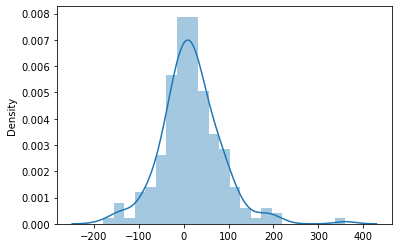

In [66]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

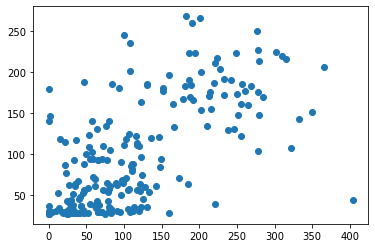

In [67]:
plt.scatter(y_test,prediction)


In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 49.778886221935394
MSE: 4774.049328213202
RMSE: 69.09449564338104


In [69]:
import pickle 

In [70]:
# open a file, where you ant to store the data
file = open('ANN.pkl', 'wb')

# dump information to that file
pickle.dump(NN_model, file)

INFO:tensorflow:Assets written to: ram://8117eccd-9b10-4e58-bdf8-833952230056/assets
